#Actividad 01, Decamiento radioactivo
Resolver la siguiente ecuacion difirencial, empleando el metodo de Euler, para ello debera consultar en una inteligencia artificial el metodo de Euler, también deberá generar el código en markdown con la explicación del método y las deducciones.


\begin{equation}
  \frac{dN}{dt} = -\lambda N
\end{equation}

In [15]:
#@title librerías

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [23]:
#@title mi código

N_0 = 1.0            #condicion inicial
t0 = 0.0
tf = 10.0
delta_t = (tf - t0) / 100       #tomamos un valor de tiempo pequeño
lam = 2

puntos = np.zeros(100)          #100 vectores que contienen al cero

def dN_dt(N_0 , delta_t, lam):
  N_i = N_0 - lam * N_0 * delta_t
  return N_i


for i in range(100):
  if i == 0:
    puntos[i] = dN_dt(N_0 , delta_t, lam)
  else:
    puntos[i] = dN_dt(puntos[i-1], delta_t, lam)

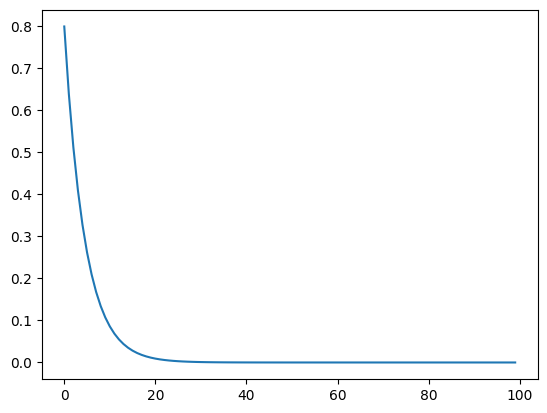

In [25]:
plt.plot(puntos);

##Pseudocódigo

```python

# Definir la función que representa la ecuación diferencial
def f(x, y):
    # Aquí va la expresión de la ecuación diferencial
    return ...

# Definir el tamaño del incremento
h = ...

# Definir la condición inicial
x0, y0 = ..., ...

# Definir el número de puntos a calcular
n = ...

# Inicializar los arreglos para guardar los valores de x e y
x = [x0]
y = [y0]

# Calcular los valores de y en los puntos sucesivos utilizando el método de Euler
for i in range(n):
    # Calcular la pendiente de la curva en el punto actual
    slope = f(x[i], y[i])
    
    # Calcular el valor de y en el siguiente punto
    y_next = y[i] + slope * h
    
    # Agregar los valores de x e y a los arreglos
    x.append(x[i] + h)
    y.append(y_next)

# Imprimir los valores de x e y
print("Valores de x:", x)
print("Valores de y:", y)
```

In [26]:
#@title solución de chat GPT

def euler(f, y0, t0, tf, h):
    """
    Resuelve una EDO de primer orden usando el método de Euler.

    f: Función que define la EDO dy/dt = f(t, y)
    y0: Valor inicial de la función y en t = t0
    t0: Valor inicial de la variable independiente t
    tf: Valor final de la variable independiente t
    h: Tamaño del paso en el método de Euler

    Retorna un arreglo numpy con los valores aproximados de la solución en los puntos t.
    """

    # Calcular el número de pasos
    n = int((tf - t0) / h)

    # Crear arreglos para los valores de t y y
    t = np.linspace(t0, tf, n+1)
    y = np.zeros(n+1)

    # Asignar el valor inicial
    y[0] = y0

    # Aplicar el método de Euler
    for i in range(n):
        y[i+1] = y[i] + h * f(t[i], y[i])

    return y

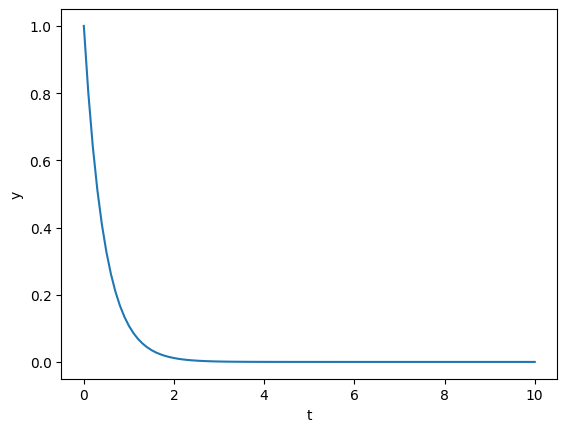

In [3]:
#ahora lo aplicamos a la funcion que nos piden

λ= 2

def f(t, N):
  return - λ * N

y0 = 1.0
t0 = 0.0
tf = 10.0
h = 0.1

y = euler(f, y0, t0, tf, h)

plt.plot(np.linspace(t0, tf, len(y)), y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

#Actividad 02, Oscilador armónico
Resolver la siguiente ecuacion difirencial, empleando el metodo de Euler.

\begin{equation}
 m\frac{d^2x}{dt^2} + kx + bv = 0
\end{equation}

Para resolver la ecuación diferencial dada usando el método de Euler, es necesario transformar la ecuación de segundo orden en dos ecuaciones de primer orden. Para hacer esto, definimos una variable auxiliar $v = dx/dt$, lo que nos da dos ecuaciones de primer orden:

$$\frac{dx}{dt} = v$$

$$\frac{dv}{dt} = -\frac{k}{m}x - \frac{b}{m}v
$$

Ahora podemos utilizar el método de Euler para aproximar la solución de estas ecuaciones de primer orden. El código para resolver la ecuación diferencial usando el método de Euler en Python es el siguiente:

##mi solución

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#@title comenzamos por considerar un oscilador armónico, en el cual no hay fricción


y_0 = 1
v_0 = -1                  #definimos las condiciones iniciales
k=1
m= 1
t_0 = 0
t_f = 5
delta_t = (t_f - t_0) / 100         #tomamos un valor pequeño del tiempo

puntos = np.zeros((500, 2))          #500 vectores con ceros de tamaño 2


def dy_dv(y_0, v_0, k, m, delta_t):
  w_2 = k/m                         #definimos la frecuencia al cuadrado para evitar tomar raiz y luego volver a elevar al cuadrado
  y_i = y_0 + v_0 * delta_t
  v_i = v_0 - w_2 * y_i * delta_t
  
  return y_i, v_i


for i in range(500):
  if i == 0:
    puntos[i] = dy_dv(y_0, v_0, k, m, delta_t)
  else:
    puntos[i] = dy_dv(*puntos[i-1], k, m, delta_t)

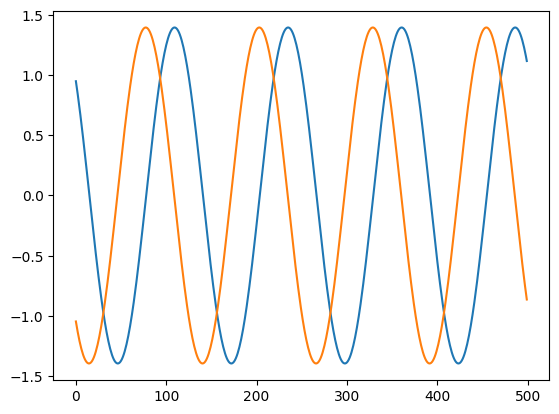

In [6]:
plt.plot(puntos);

In [7]:
#@title aplicamos el mismo código anterior, pero considerando la fricción


y_0 = 1
v_0 = -1                  #definimos las condiciones iniciales
k=1
b= 0.01
m= 1
t_0 = 0
t_f = 5
delta_t = (t_f - t_0) / 100         #tomamos un valor pequeño del tiempo

puntos_2 = np.zeros((500, 2))          #500 vectores con ceros de tamaño 2


def dy_dv(y_0, v_0, k, m, delta_t, b):
  w_2 = k/m                         #definimos la frecuencia al cuadrado para evitar tomar raiz y luego volver a elevar al cuadrado
  y_i = y_0 + v_0 * delta_t
  v_i = v_0 - w_2 * y_i * delta_t - b* v_0
  
  return y_i, v_i


for i in range(500):
  if i == 0:
    puntos_2[i] = dy_dv(y_0, v_0, k, m, delta_t, b)
  else:
    puntos_2[i] = dy_dv(*puntos_2[i-1], k, m, delta_t, b)

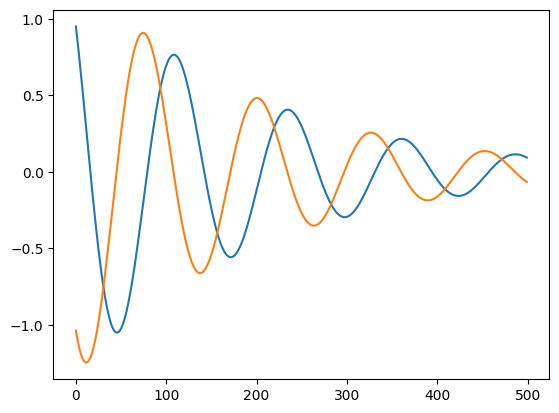

In [8]:
plt.plot(puntos_2);

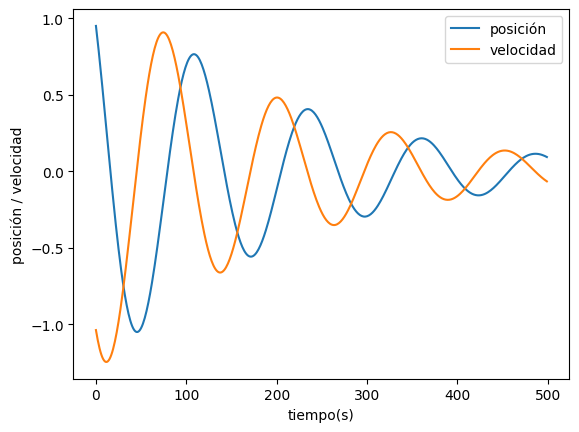

In [9]:
plt.plot(puntos_2[:,0], label = 'posición')    #para que me dirija a la primera fila y columa del vector
plt.plot(puntos_2[:,1], label ='velocidad')
plt.xlabel('tiempo(s)')
plt.ylabel('posición / velocidad')
plt.legend();

##solucion de chat gpt

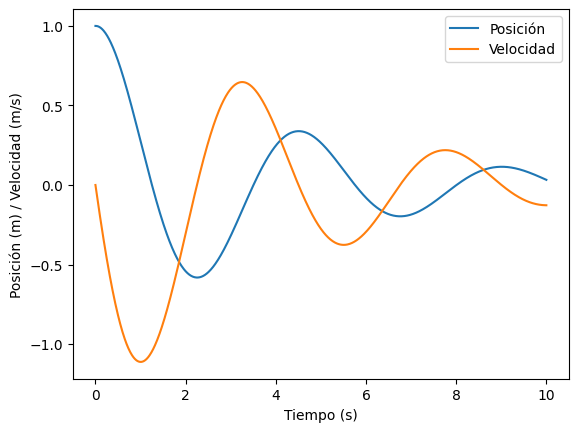

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
m = 1.0
k = 2.0
b = 0.5

# Condiciones iniciales
x0 = 1.0
v0 = 0.0
t0 = 0.0
tf = 10.0
h = 0.01

# Función para la EDO de primer orden
def f(t, y):
    x, v = y
    dxdt = v
    dvdt = -(k/m)*x - (b/m)*v
    return np.array([dxdt, dvdt])

# Método de Euler
t = np.arange(t0, tf+h, h)
y = np.zeros((len(t), 2))
y[0, 0] = x0
y[0, 1] = v0
for i in range(len(t)-1):
    y[i+1] = y[i] + h*f(t[i], y[i])

# Graficar la solución
fig, ax = plt.subplots()
ax.plot(t, y[:, 0], label='Posición')
ax.plot(t, y[:, 1], label='Velocidad')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posición (m) / Velocidad (m/s)')
ax.legend()
plt.show()


Veamos nuevamente como podemos hacer lo anterior, empleando el método de Euler.

PROBLEMA: dado x_0, v_0, encontrar la evolución en 3 puntos

#trabajo de clase

In [11]:
a = 0
b= 1
lam = 10
Npoints = 100          #numero de puntos
Ni = 500       #poblacion inicial
t = np.linspace(a, b, Npoints)
dt = (b-a)/Npoints

N = np.zeros(Npoints)              #array para encontrar el decaimiento radiactivo
N[0] = Ni

fun = lambda t, N : -lam * N

In [12]:
for i, j in enumerate(t[:-1]):
  N[i+1] = N[i] + fun(j, N[i]) * dt

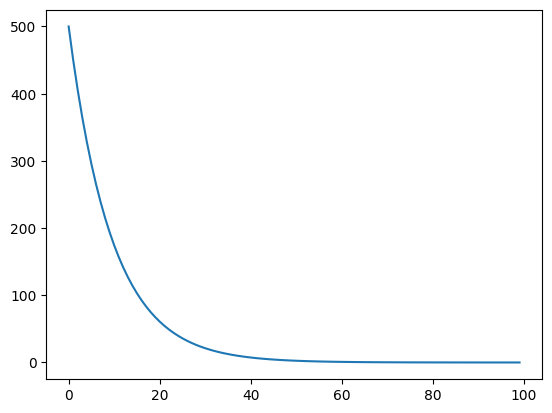

In [13]:
plt.plot(N);

#observ el decaimiento radiactio, el cual tiene una forma exponencial